In [5]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Drop rows with missing flipper_length_mm or species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Group data by species
species_groups = penguins.groupby('species')

# Create an empty figure
fig = go.Figure()

# Colors for each species
colors = {
    'Adelie': 'blue',
    'Chinstrap': 'green',
    'Gentoo': 'purple'
}

# Iterate over each species to create histograms and add lines/rectangles
for species, group in species_groups:
    # Calculate statistics
    flipper_length = group['flipper_length_mm']
    mean = flipper_length.mean()
    median = flipper_length.median()
    min_val = flipper_length.min()
    max_val = flipper_length.max()
    std = flipper_length.std()
    q1 = flipper_length.quantile(0.25)
    q3 = flipper_length.quantile(0.75)
    
    # Add histogram for the current species
    fig.add_trace(go.Histogram(x=flipper_length, name=f'{species} Flipper Length', opacity=0.5, marker=dict(color=colors[species])))
    
    # Add vertical lines for mean and median with appropriate labels in the legend
    fig.add_trace(go.Scatter(x=[mean, mean], y=[0, 1], mode="lines", name=f'{species} Mean', line=dict(color=colors[species], dash='dash')))
    fig.add_trace(go.Scatter(x=[median, median], y=[0, 1], mode="lines", name=f'{species} Median', line=dict(color=colors[species], dash='dot')))

    # Add shaded regions for range, IQR, and mean ± 2 standard deviations
    fig.add_trace(go.Scatter(x=[min_val, max_val, max_val, min_val], y=[0, 0, 1, 1], fill="toself", mode="none", name=f'{species} Range', fillcolor=colors[species], opacity=0.1))
    fig.add_trace(go.Scatter(x=[q1, q3, q3, q1], y=[0, 0, 1, 1], fill="toself", mode="none", name=f'{species} IQR', fillcolor=colors[species], opacity=0.2))
    fig.add_trace(go.Scatter(x=[mean - 2*std, mean + 2*std, mean + 2*std, mean - 2*std], y=[0, 0, 1, 1], fill="toself", mode="none", name=f'{species} 2 Std Dev', fillcolor=colors[species], opacity=0.2))

# Update layout for better readability
fig.update_layout(
    title="Flipper Length Distribution and Statistical Summaries by Species",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode='overlay',
    legend=dict(title="Statistics")
)

# Show the figure
fig.show()

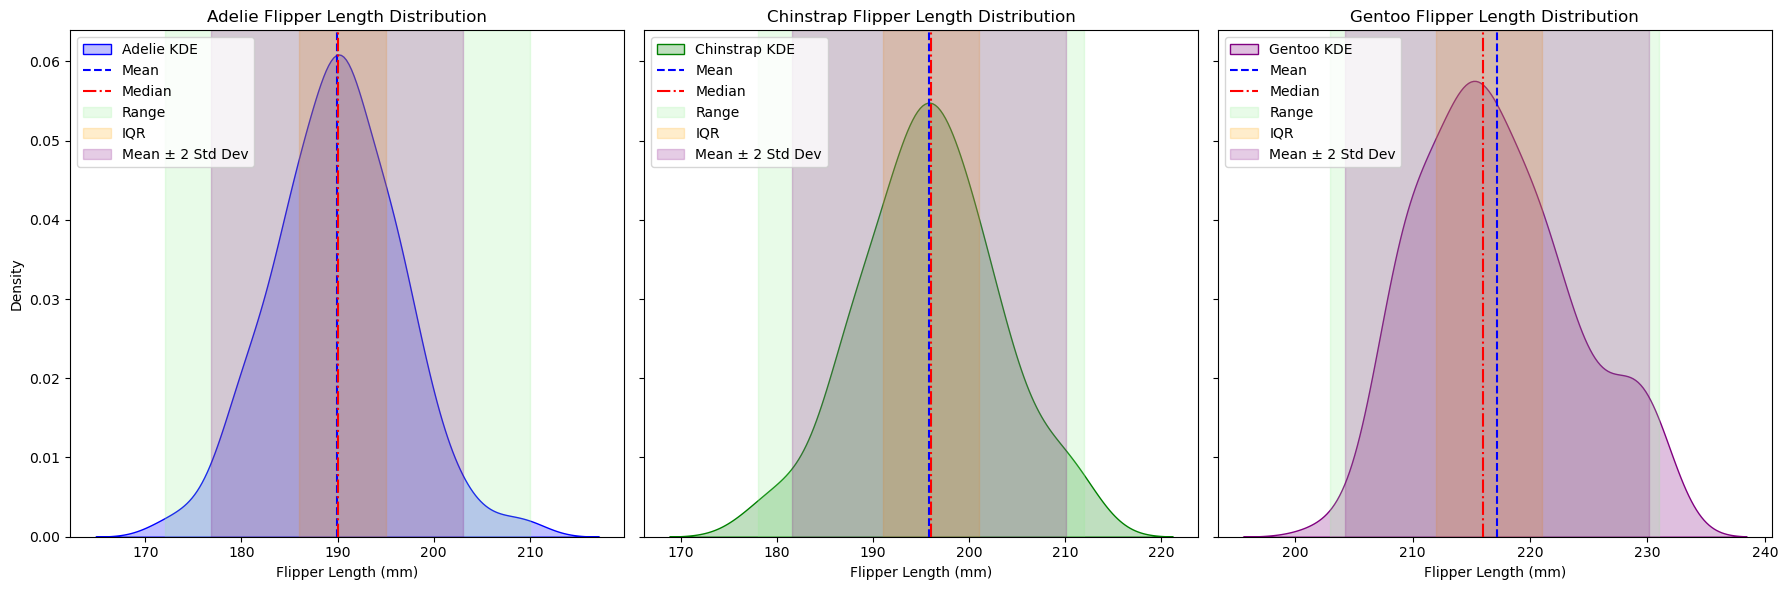

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Drop rows with missing flipper_length_mm or species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Create a list of species
species_list = penguins['species'].unique()

# Set up the figure and axes (one row with three subplots)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Colors for each species
colors = {
    'Adelie': 'blue',
    'Chinstrap': 'green',
    'Gentoo': 'purple'
}

# Iterate over each species and create a KDE plot
for ax, species in zip(axes, species_list):
    # Subset the data for the current species
    data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistical summaries
    mean = data.mean()
    median = data.median()
    min_val = data.min()
    max_val = data.max()
    std = data.std()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    
    # Plot the KDE for the current species
    sns.kdeplot(data, ax=ax, fill=True, color=colors[species], label=f'{species} KDE')

    # Add vertical lines for mean and median
    ax.axvline(mean, color='blue', linestyle='--', label='Mean')
    ax.axvline(median, color='red', linestyle='-.', label='Median')
    
    # Shade the range (min to max)
    ax.axvspan(min_val, max_val, color='lightgreen', alpha=0.2, label='Range')
    
    # Shade the interquartile range (IQR: Q1 to Q3)
    ax.axvspan(q1, q3, color='orange', alpha=0.2, label='IQR')
    
    # Shade the region within 2 standard deviations of the mean
    ax.axvspan(mean - 2*std, mean + 2*std, color='purple', alpha=0.2, label='Mean ± 2 Std Dev')
    
    # Set plot titles and labels
    ax.set_title(f'{species} Flipper Length Distribution')
    ax.set_xlabel('Flipper Length (mm)')
    ax.legend(loc='upper left')  # Legend inside the plot

# Add shared y-axis label
axes[0].set_ylabel('Density')

# Tight layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()

3. 

Bar graphs are designed to represend discrete data while histograms and kernel density estimates are meant to represent 
continous data; it is inconvenient to compare box plots with histaograms and kernel density estimates on a basis other than 
asthetics and usefulness. As seen from our course and other posters containing graphs around the uoft campus, continous data is
more frequently the subject of research and examination, thus I conclude that histograms and kernel density estimates are more
useful and also happen to be more asthetic than bar graphs. 
Between histograms and kernel density estimates, my preference is for the historgram for the following reasons
    1. Histograms are easier to create when less complex tools are available
    2. If enough bins are created, there is very little information a kernel density estimate can convey that a histogram cannot
    3. Since a kernel density estimate is an estimation, some information is still lost


4.

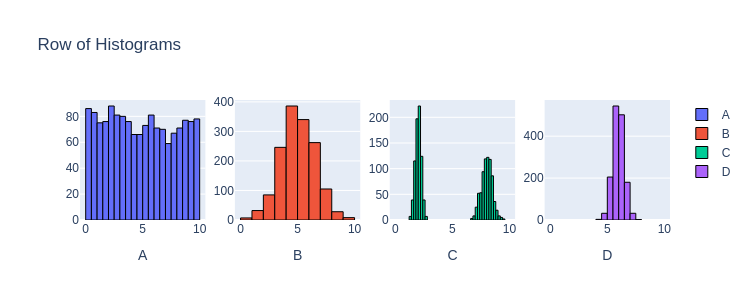

In [7]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1.Which datasets have similar means and similar variances
A and C

2.Which datasets have similar means but quite different variances
C and B

3.Which datasets have similar variances but quite different means
B and D

4.Which datasets have quite different means and quite different variances
D and C

In [1]:
6. 
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns


,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [ ]:
We observe that many of the categories are concerned with calories,
so we make a graph of the freqeuncy of amount of calories for each food

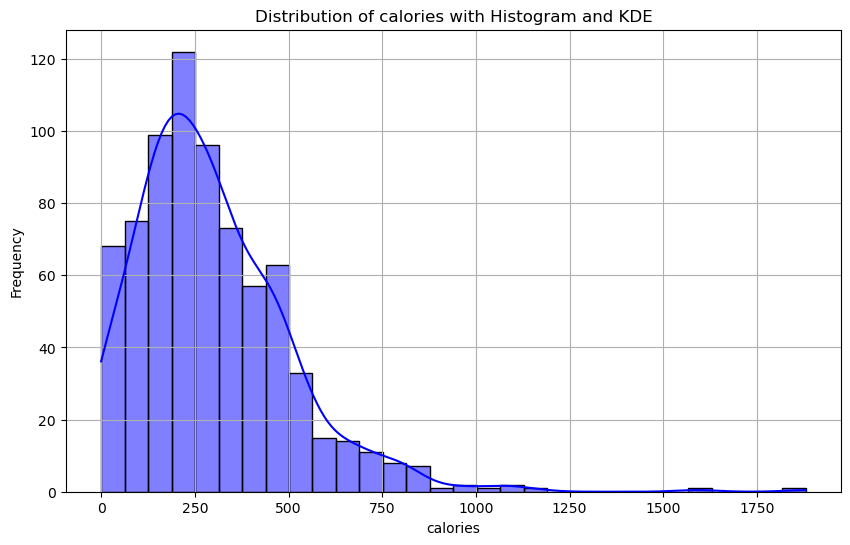

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Select a column to plot (e.g., 'Calories')
column_to_plot = 'calories'

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot a histogram and KDE together using Seaborn
sns.histplot(df[column_to_plot].dropna(), kde=True, color='blue', bins=30, edgecolor='black')

# Customize the plot
plt.title(f'Distribution of {column_to_plot} with Histogram and KDE')
plt.xlabel(f'{column_to_plot}')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()




In [ ]:
We want to see which categories are corrolated to calories, so we check sugar and protein

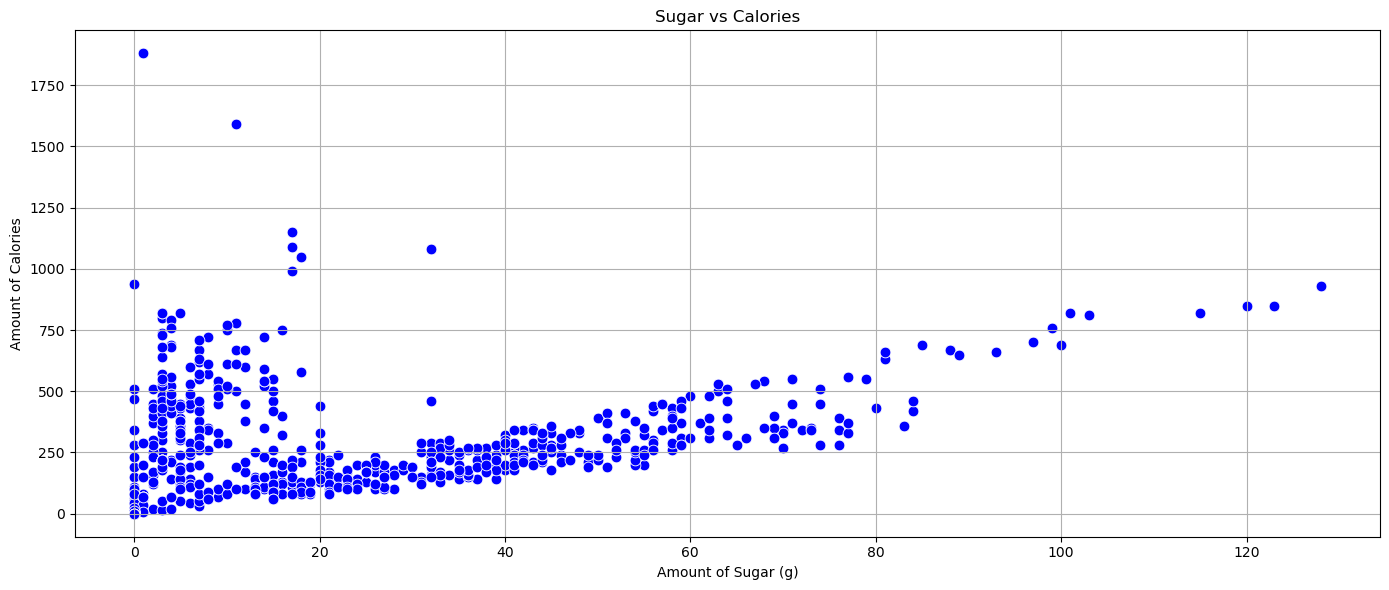

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Correct column names for sugar and calories
sugar_column = 'sugars (g)'  # Actual column name for sugar
calories_column = 'calories'  # Actual column name for calories

# Filter the dataset to only include 'sugars (g)' and 'calories'
df_filtered = df[[sugar_column, calories_column]].dropna()

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 1, figsize=(14, 6))

# Subplot 1: Scatter plot of Sugar vs Calories
sns.scatterplot(data=df_filtered, x=sugar_column, y=calories_column, color='blue', s=60)
plt.title('Sugar vs Calories')
plt.xlabel('Amount of Sugar (g)')
plt.ylabel('Amount of Calories')
plt.grid(True)



# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plots
plt.show()


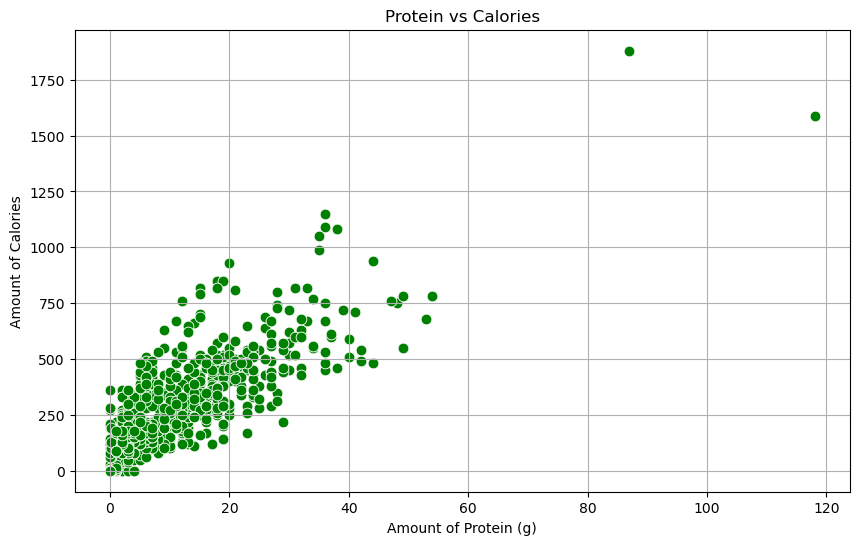

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Correct column names for protein and calories
protein_column = 'protein (g)'  # Actual column name for protein
calories_column = 'calories'    # Actual column name for calories

# Filter the dataset to only include 'protein (g)' and 'calories'
df_filtered = df[[protein_column, calories_column]].dropna()

# Create the scatter plot for Protein vs Calories
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x=protein_column, y=calories_column, color='green', s=60)

# Customize the plot
plt.title('Protein vs Calories')
plt.xlabel('Amount of Protein (g)')
plt.ylabel('Amount of Calories')
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
We are curious about the relationship between protein and sugar, so we plot it too

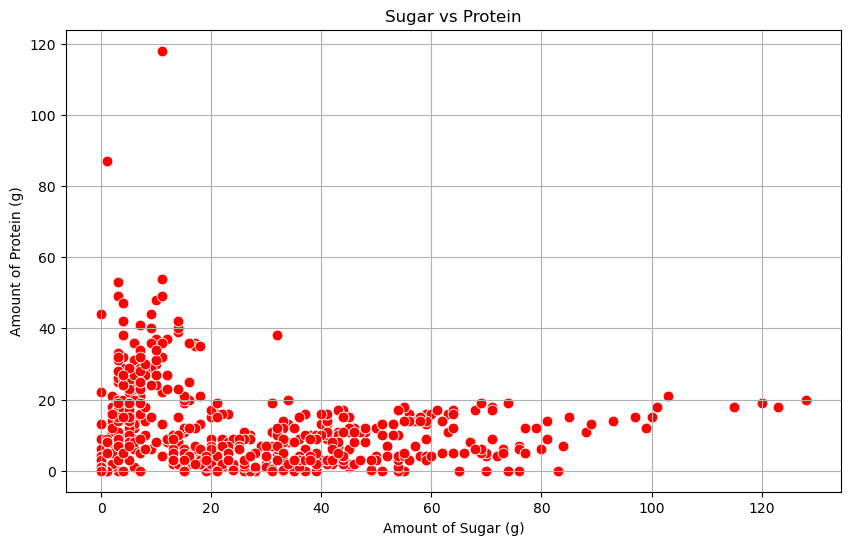

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Correct column names for sugar and protein
sugar_column = 'sugars (g)'   # Actual column name for sugar
protein_column = 'protein (g)' # Actual column name for protein

# Filter the dataset to only include 'sugars (g)' and 'protein (g)'
df_filtered = df[[sugar_column, protein_column]].dropna()

# Create the scatter plot for Sugar vs Protein
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x=sugar_column, y=protein_column, color='red', s=60)

# Customize the plot
plt.title('Sugar vs Protein')
plt.xlabel('Amount of Sugar (g)')
plt.ylabel('Amount of Protein (g)')
plt.grid(True)

# Show the plot
plt.show()